In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Load the data

file_path = 'Resources/weatherAUS.csv'
df = pd.read_csv(file_path)
df1 = df.copy
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [77]:
df.shape

(145460, 26)

In [78]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
Year             145460
Month            145460
day              145460
dtype: int64

In [79]:
import missingno
%matplotlib inline

<AxesSubplot:>

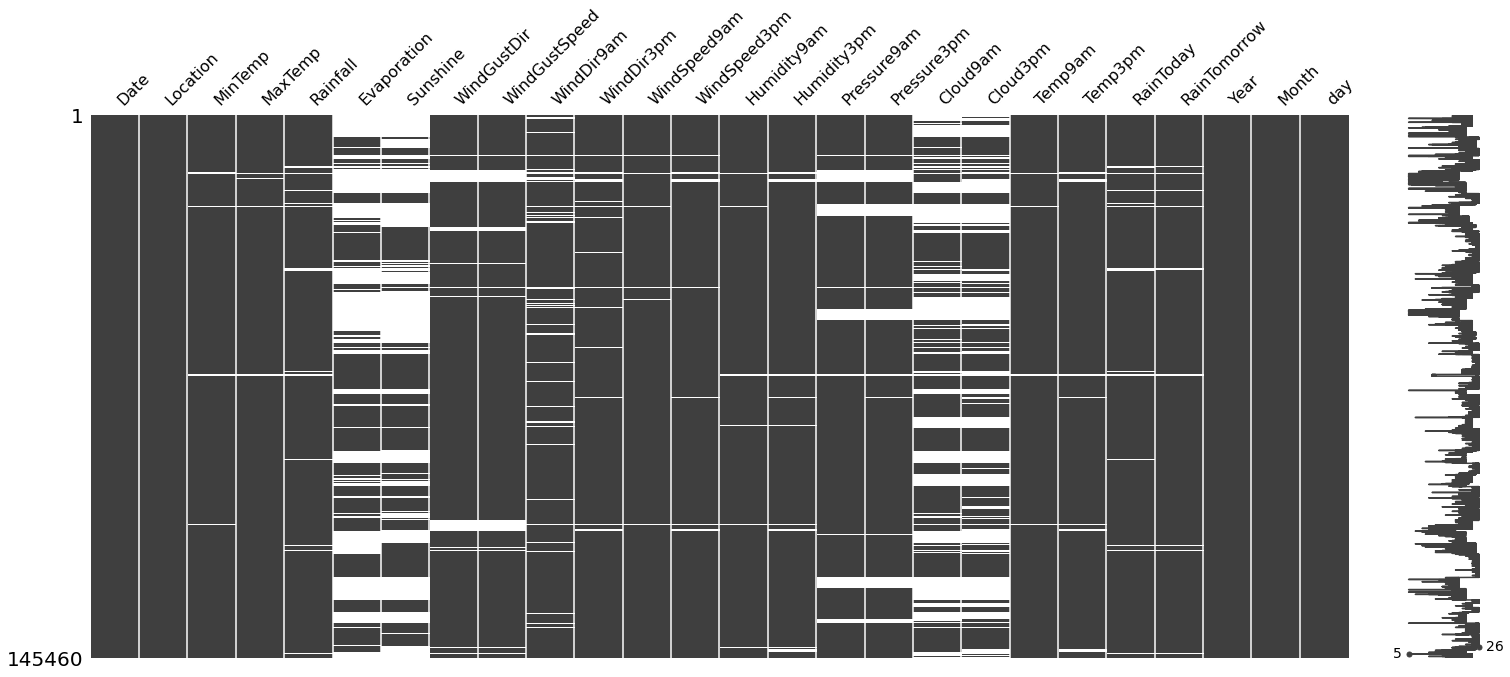

In [80]:
 missingno.matrix(df)

<AxesSubplot:>

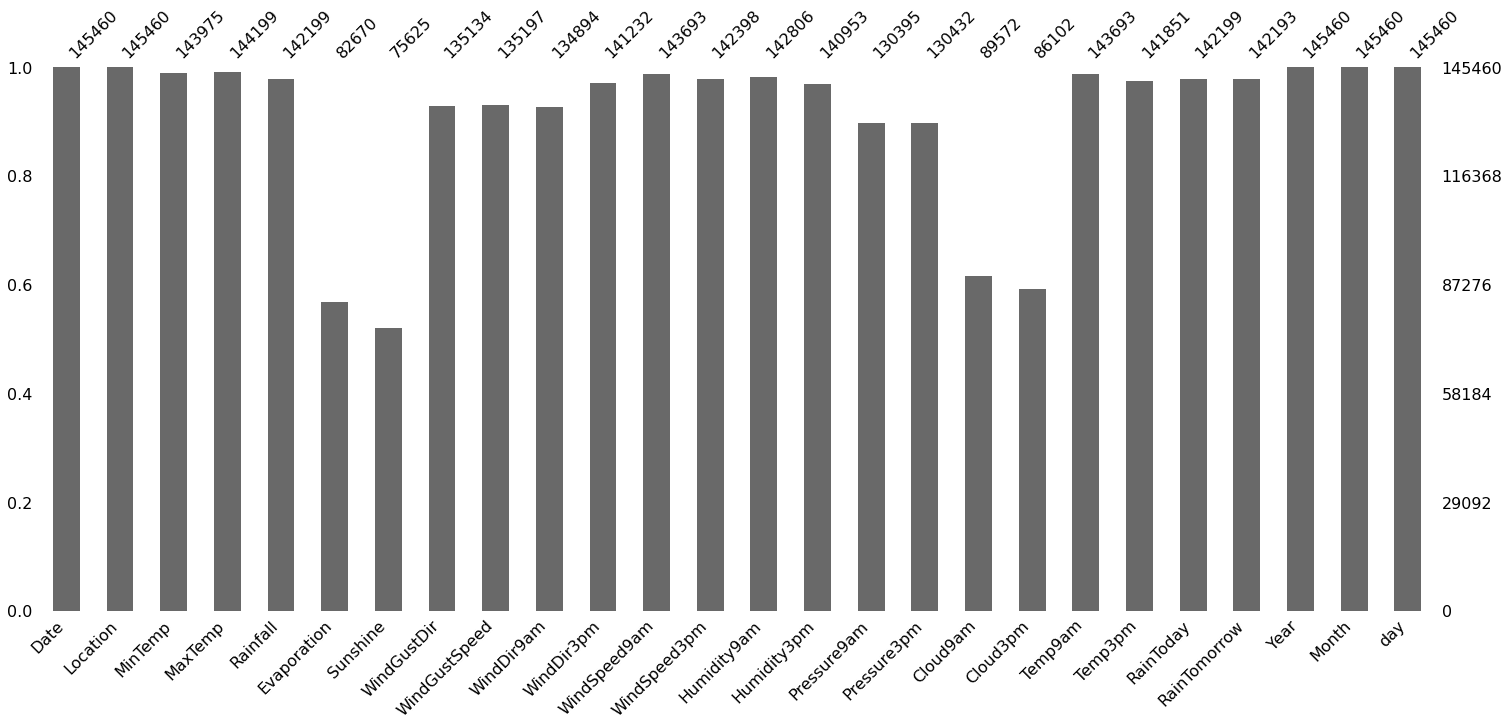

In [81]:
missingno.bar(df)

In [98]:
df.Year.value_counts()

2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: Year, dtype: int64

In [99]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Melbourne           3193
Hobart              3193
Perth               3193
Brisbane            3193
Bendigo             3040
Cairns              3040
AliceSprings        3040
Albury              3040
GoldCoast           3040
MountGambier        3040
Townsville          3040
Wollongong          3040
MountGinini         3040
Launceston          3040
Albany              3040
Ballarat            3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
MelbourneAirport    3009
CoffsHarbour        3009
Williamtown         3009
WaggaWagga          3009
Nuriootpa           3009
Cobar               3009
PearceRAAF          3009
Woomera             3009
Sale                3009
Richmond            3009
Portland            3009
NorfolkIsland       3009
SydneyAirport       3009
Moree               3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009


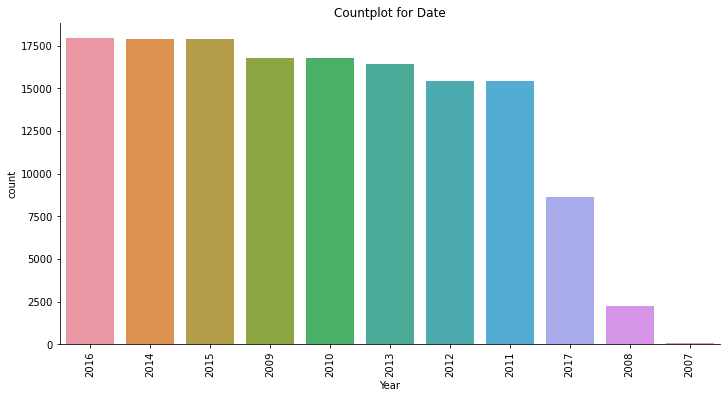

In [104]:
import seaborn as sns

fig = sns.catplot(x=df.columns[23], kind='count', data=df,aspect=2, order=df[df.columns[23]].value_counts().index)
fig.set_xticklabels(rotation=90)
fig.set(title='Countplot for Date')

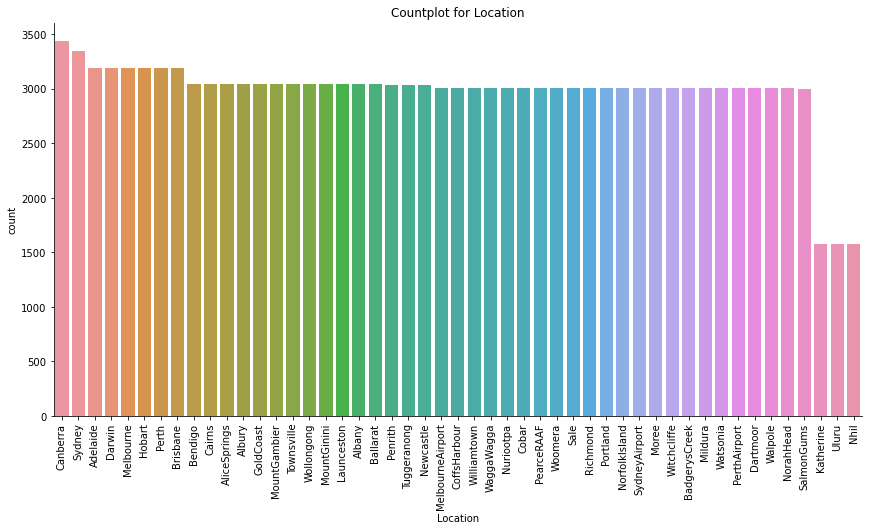

In [89]:
import seaborn as sns

fig = sns.catplot(x=df.columns[1], kind='count', data=df, height=6, aspect=2, order=df[df.columns[1]].value_counts().index)
fig.set_xticklabels(rotation=90)
fig.set(title='Countplot for Location')

## Feature Correlation
#### Heatmap
- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

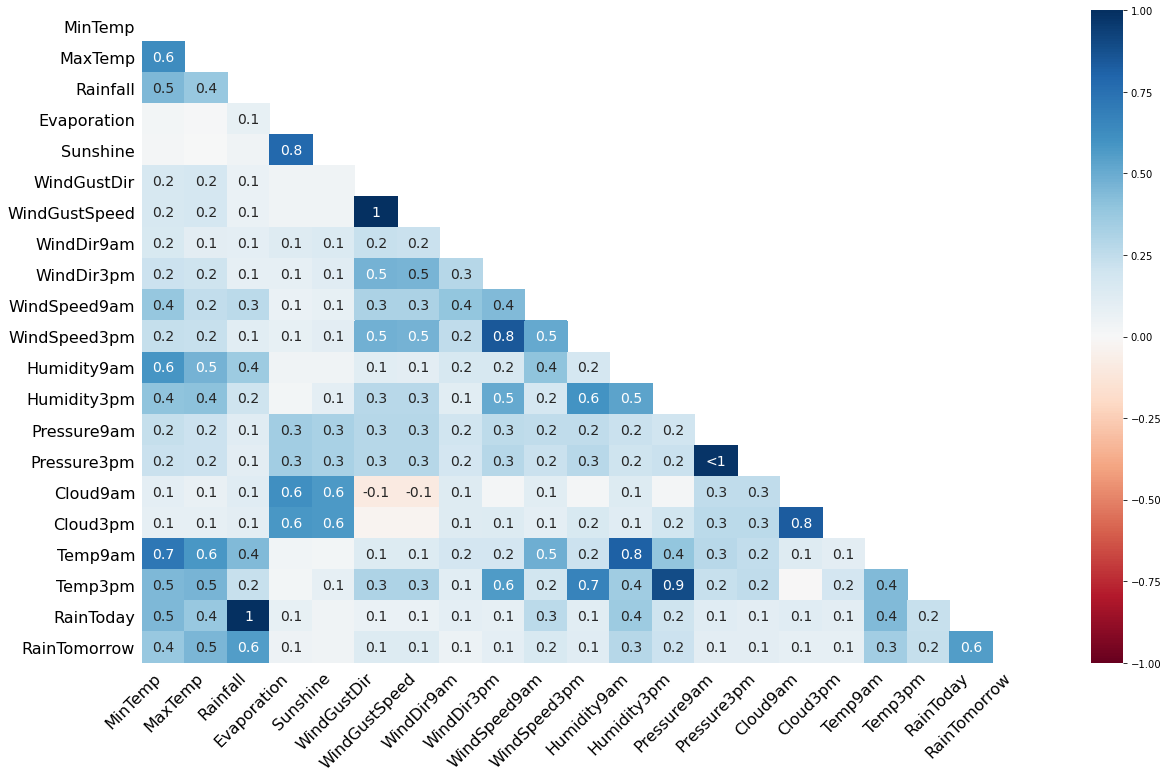

In [61]:
missingno.heatmap(df)

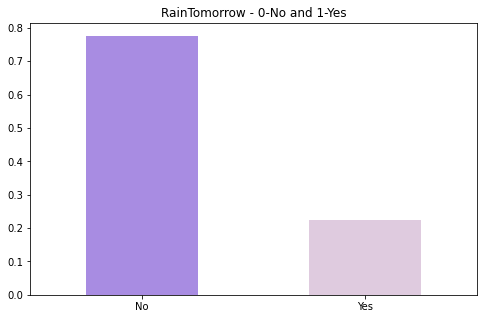

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['mediumpurple','thistle'], alpha = 0.8, rot=0)
plt.title('RainTomorrow - 0-No and 1-Yes')
plt.show()

In [63]:
zeros_cnt = df.isnull().sum().sort_values(ascending=False)
zeros_cnt

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Month                0
Year                 0
Date                 0
Location             0
day                  0
dtype: int64

In [ ]:
import seaborn as sns
sns.pairplot(df[:1000])
#sns.pairplot(df, hue="RainTomorrow")

## Feature Engineering

#### Feature selection/Handle missing values
Possible options:
- drop columns that are missing values over a certain threshold
- populate missing values (with average)

In [ ]:
df.groupby(df['Year', 'Location']).sum()['Rainfall']

In [7]:
num_cols = df.select_dtypes('float64').columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [64]:
#percent missing = missing values in each column / total  number of rows (df.isna().count(), len(df), df.isnull().count() etc)
percent_missing = (df.isnull().sum() / len(df)).sort_values(ascending=False)    
percent_missing

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
RainToday        0.022419
Rainfall         0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Month            0.000000
Year             0.000000
Date             0.000000
Location         0.000000
day              0.000000
dtype: float64

In [8]:
for i in num_cols:
    df[i].fillna(df[i].mean(), inplace=True) # Mean or Median

In [9]:
df.count()

Date             145460
Location         145460
MinTemp          145460
MaxTemp          145460
Rainfall         145460
Evaporation      145460
Sunshine         145460
WindGustDir      135134
WindGustSpeed    145460
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     145460
WindSpeed3pm     145460
Humidity9am      145460
Humidity3pm      145460
Pressure9am      145460
Pressure3pm      145460
Cloud9am         145460
Cloud3pm         145460
Temp9am          145460
Temp3pm          145460
RainToday        142199
RainTomorrow     142193
Year             145460
Month            145460
day              145460
dtype: int64

<AxesSubplot:>

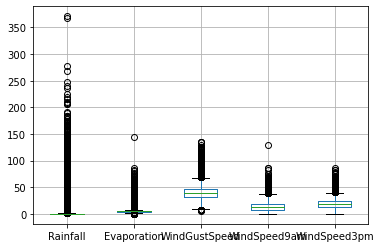

In [10]:
df.boxplot(column=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm'])